# glmnet: Lasso and Elastic-Net Regularized Generalized Linear Models

- TA: WANG Zhiwei
- Date: November 8, 2022

In [1]:
set.seed(20221106)
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-6



- We will use the `glmnet` package to perform ridge regression and the lasso.
- The main function in this package is `glmnet()`, which can be used to fit ridge regression models, lasso models, and more. 
- This function has slightly different syntax from other model-fitting functions that we have encountered thus far.
- In particular, we must pass in an x matrix as well as a y vector, and __we do not use the `y ∼ x` syntax__.

## `Hitters` dataset

In [2]:
library(ISLR2)
Hitters <- na.omit(Hitters)
dim(Hitters)
head(Hitters)

[1] 263  20

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A


## Dummy variable

<p style='color:red'>Note that there are three factors and how could we convert them to the matrix?</p>

In [3]:
summary(Hitters[, c("League", "Division", "NewLeague")])
table(Hitters[, c("League", "Division", "NewLeague")])

 League  Division NewLeague
 A:139   E:129    A:141    
 N:124   W:134    N:122    

, , NewLeague = A

      Division
League  E  W
     A 64 67
     N  5  5

, , NewLeague = N

      Division
League  E  W
     A  4  4
     N 56 58


Based on one factor with two levels, e.g., "League", we can divide all the players into two groups with one dummy variable.

But actually, the `model.matrix()` function will give us one more term `Intercept`. <font color='red'>Why</font> ?

In [4]:
dummy <- model.matrix(Salary ~ League, Hitters)
head(dummy)

,(Intercept),LeagueN
-Alan Ashby,1,1
-Alvin Davis,1,0
-Andre Dawson,1,1
-Andres Galarraga,1,1
-Alfredo Griffin,1,0
-Al Newman,1,1


In [5]:
dummy <- model.matrix(Salary ~ League + Division + NewLeague, Hitters)
head(dummy)

,(Intercept),LeagueN,DivisionW,NewLeagueN
-Alan Ashby,1,1,1,1
-Alvin Davis,1,0,1,0
-Andre Dawson,1,1,0,1
-Andres Galarraga,1,1,0,1
-Alfredo Griffin,1,0,1,0
-Al Newman,1,1,0,0


In [6]:
x <- model.matrix(Salary ~ ., Hitters)
head(x)

,(Intercept),AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Alan Ashby,1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
-Alvin Davis,1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
-Andre Dawson,1,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
-Andres Galarraga,1,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
-Alfredo Griffin,1,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
-Al Newman,1,185,37,1,23,8,21,2,214,42,1,30,9,24,1,0,76,127,7,0


Based on three factors and each of them has two levels, we can divide all the players into eight groups with three dummy variables.

In [7]:
x <- model.matrix(Salary ~ ., Hitters)[, -1]
head(x)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,1,0,76,127,7,0


In [8]:
y <- Hitters$Salary
head(y)

[1] 475.0 480.0 500.0  91.5 750.0  70.0

## `alpha` argument in glmnet

- `alpha = 0` then a __ridge__ regression
- `alpha = 1` then a __lasso__ regression
- By default, `alpha = 0`, the `glmnet()` function performs ridge regression for an automatically selected range of λ values. 

- For demonstration, however, we manually choose a grid of values ranging from $\lambda=10^{10}$ to $\lambda=10^{-2}$
- It covers the full range of scenarios from the null model containing only the intercept, to the least squares fit.

## Ridge Regression: `alpha = 0`

In [9]:
grid <- 10^seq(10, -2, length = 100)
ridge.mod <- glmnet(x, y, alpha = 0, lambda = grid)

- Associated with each value of λ is a vector of ridge regression coefficients, stored in a matrix that can be accessed by `coef()`. 
- In this case, it is a $20 \times 100$ matrix, with 20 rows (one for each predictor, plus an intercept) and 100 columns (one for each value of λ).

In [10]:
dim(coef(ridge.mod))
coef(ridge.mod)[1:20, 1:6]

[1]  20 100

20 x 6 sparse Matrix of class "dgCMatrix"
                       s0            s1            s2            s3
(Intercept)  5.359257e+02  5.359256e+02  5.359256e+02  5.359254e+02
AtBat        5.443467e-08  7.195940e-08  9.512609e-08  1.257511e-07
Hits         1.974589e-07  2.610289e-07  3.450649e-07  4.561554e-07
HmRun        7.956523e-07  1.051805e-06  1.390424e-06  1.838059e-06
Runs         3.339178e-07  4.414196e-07  5.835307e-07  7.713931e-07
RBI          3.527222e-07  4.662778e-07  6.163918e-07  8.148335e-07
Walks        4.151323e-07  5.487803e-07  7.254552e-07  9.590089e-07
Years        1.697711e-06  2.244274e-06  2.966798e-06  3.921931e-06
CAtBat       4.673743e-09  6.178412e-09  8.167496e-09  1.079695e-08
CHits        1.720071e-08  2.273832e-08  3.005872e-08  3.973585e-08
CHmRun       1.297171e-07  1.714783e-07  2.266842e-07  2.996631e-07
CRuns        3.450846e-08  4.561814e-08  6.030449e-08  7.971898e-08
CRBI         3.561348e-08  4.707892e-08  6.223556e-08  8.227173e-08
CWalks

- We expect the coefficient estimates to be much smaller, in terms of $l_2$ norm,when a large value of λ is used, as compared to when a small value of λ is used. 
- These are the coefficients when $\lambda = 11498$, along with their $l_2$ norm:

In [11]:
ridge.mod$lambda[50]
coef(ridge.mod)[, 50]
sqrt(sum(coef(ridge.mod)[-1, 50]^2))

[1] 11497.57

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

[1] 6.360612

- In contrast, here are the coefficients when $\lambda = 705$, along with their $l_2$ norm. 
- Note the much larger $l_2$ norm of the coefficients associated with this smaller value of λ.

In [12]:
ridge.mod$lambda[60]
coef(ridge.mod)[, 60]
sqrt(sum(coef(ridge.mod)[-1, 60]^2))

[1] 705.4802

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

[1] 57.11001

When $\lambda = 10^{10}$, everything is almost 0 except the intercept!

In [13]:
ridge.mod$lambda[1]
coef(ridge.mod)[, 1]
sqrt(sum(coef(ridge.mod)[-1, 1]^2))

[1] 1e+10

(Intercept)         AtBat          Hits         HmRun          Runs 
 5.359257e+02  5.443467e-08  1.974589e-07  7.956523e-07  3.339178e-07 
          RBI         Walks         Years        CAtBat         CHits 
 3.527222e-07  4.151323e-07  1.697711e-06  4.673743e-09  1.720071e-08 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 1.297171e-07  3.450846e-08  3.561348e-08  3.767877e-08 -5.800263e-07 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-7.807263e-06  2.180288e-08  3.561198e-09 -1.660460e-08 -1.152288e-07

[1] 8.080244e-06

## Let's simply visualize the coefficients!

In [14]:
coef.ridge <- data.frame(Variable = rep(rownames(coef(ridge.mod))[-1], 2),
                        Coefficient = c(coef(ridge.mod)[-1, 50], coef(ridge.mod)[-1, 60]),
                        lambda = rep(c(ridge.mod$lambda[50], ridge.mod$lambda[60]), each = 19))
coef.ridge$lambda <- round(coef.ridge$lambda)
coef.ridge$lambda <- factor(coef.ridge$lambda)

head(coef.ridge)

,Variable,Coefficient,lambda
,<chr>,<dbl>,<fct>
1,AtBat,0.03695718,11498
2,Hits,0.13818034,11498
3,HmRun,0.52462998,11498
4,Runs,0.23070152,11498
5,RBI,0.23984146,11498
6,Walks,0.28961874,11498


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


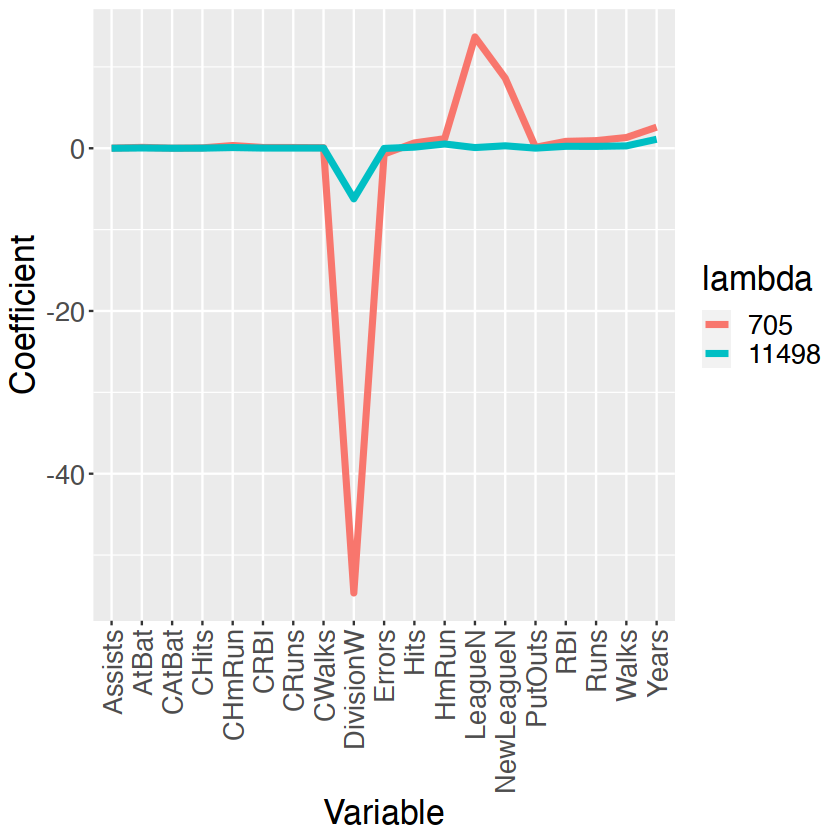

In [15]:
library(ggplot2)
ggplot(data = coef.ridge, aes(x = Variable, y = Coefficient,
                                       group = lambda, color = lambda)) +
    geom_line(size = 1.5) +
    theme(
        text = element_text(size = 20),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)
    )

## `predict()`

- We can use the `predict()` function for a number of purposes.
- For instance, we can obtain the ridge regression coefficients for a given value of $\lambda$, say 50:

In [16]:
predict(ridge.mod, s = 50, type = "coefficients")[1:20, ]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

- We now split the samples into a training set and a test set in order to estimate the test error of ridge regression and the lasso.

In [17]:
train <- sample(1:nrow(x), nrow(x) / 2)
test <- (-train)
y.test <- y[test]

ridge.mod <- glmnet(x[train, ], y[train], alpha = 0, lambda = grid, thresh = 1e-11)

- When $\lambda$ is large, all parameters have small absolute values due to strong penalty.
The result will be close to the one obtained by fitting only an intercept term

In [18]:
sqrt(mean((mean(y[train]) - y.test)^2)) # Fit only an intercept term

ridge.pred <- predict(ridge.mod, s = 1e10, newx = x[test, ])
sqrt(mean((ridge.pred - y.test)^2))

[1] 466.9041

[1] 466.904

- When $\lambda$ is small, all parameters will tend to the LSE due to mild penalty.

In [19]:
ridge.pred <- predict(ridge.mod, s = 1, newx = x[test, ])
sqrt(mean((ridge.pred - y.test)^2)) # RMSE

[1] 357.1379

- When $\lambda = 0$, the results are expected to be exactly the same as that of linear regression.

In [20]:
ridge.pred <- predict(ridge.mod, s = 0, newx = x[test, ], exact = T, x = x[train, ], y = y[train])
sqrt(mean((ridge.pred - y.test)^2))
predict(ridge.mod, s = 0, type = "coefficients", x = x[train, ], y = y[train])[1:20, ]

[1] 356.9254

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 194.2247490   -1.7141112    5.4672945   17.1545839   -0.5948807   -4.4408637 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   7.6635059    4.6021105   -0.1349974   -0.2870884   -3.4761994    1.5266902 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   1.6085490   -0.6438661  -35.0897330 -139.7916908    0.2851373    0.8375696 
      Errors   NewLeagueN 
 -12.1881415  108.4231241

In [21]:
# Linear regression
lm.mod <- lm(y ~ x, subset = train)
coef(lm.mod)

(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI 
 194.2888063   -1.7174427    5.4925771   17.2033645   -0.6323878   -4.4538111 
      xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns 
   7.6752028    4.6026602   -0.1342034   -0.3021681   -3.5135630    1.5471980 
       xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists 
   1.6245821   -0.6493097  -35.3473264 -139.4976489    0.2850622    0.8368774 
     xErrors  xNewLeagueN 
 -12.1689202  108.7669788

- `lm()` and `glmnet()` resultaes are not exactly equivalent because glmnet applies a coordinate descent algorithm.

## Let's simply visualize the coefficients!

,Variable,Coefficient,Method
,<chr>,<dbl>,<fct>
1,(Intercept),194.2247490,glmnet
2,AtBat,-1.7141112,glmnet
3,Hits,5.4672945,glmnet
4,HmRun,17.1545839,glmnet
5,Runs,-0.5948807,glmnet
6,RBI,-4.4408637,glmnet


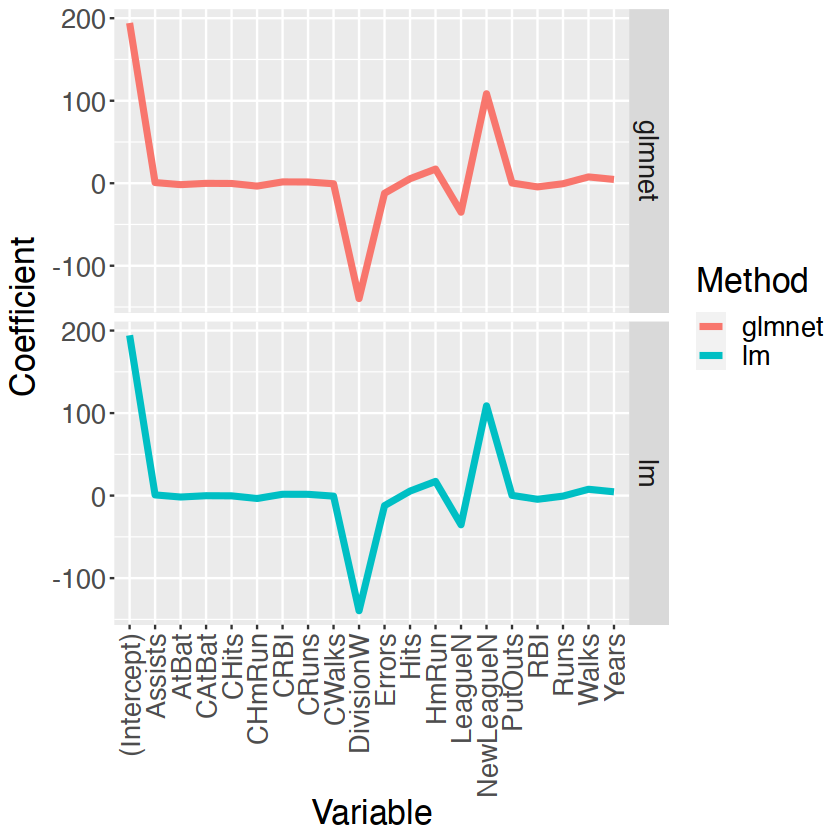

In [22]:
coef.glmnet.lm <- data.frame(
    Variable = rep(rownames(coef(ridge.mod)), 2),
    Coefficient = c(
        predict(ridge.mod, s = 0, type = "coefficients", x = x[train, ], y = y[train])[1:20, ],
        coef(lm.mod)
    ),
    Method = rep(c("glmnet", "lm"), each = 20)
)
coef.glmnet.lm$Method <- factor(coef.glmnet.lm$Method)

head(coef.glmnet.lm)

ggplot(data = coef.glmnet.lm, aes(
    x = Variable, y = Coefficient,
    group = Method, color = Method
)) +
    geom_line(size = 1.5) +
    facet_grid(Method ~ .) +
    theme(
        text = element_text(size = 20),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)
    )

- In general, instead of arbitrarily choosing $\lambda = 4$, it would be better to use cross-validation to choose the tuning parameter $\lambda$.
- We can do this using the built-in cross-validation function, `cv.glmnet()`.
- By default, the function `cv.glmnet()` performs __ten-fold__ cross-validation, though this can be changed using the argument `nfolds`.

[1] 244.8365

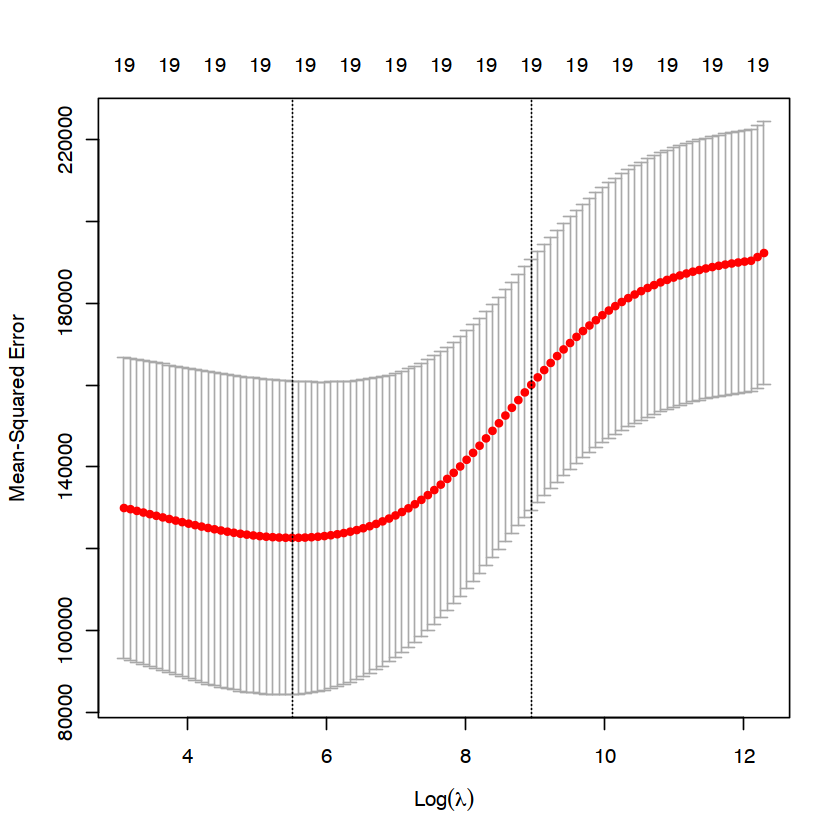

In [23]:
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 0)
plot(cv.out)
bestlam <- cv.out$lambda.min
bestlam

- Therefore, we see that the value of $\lambda$ that results in the smallest crossvalidation error is 244.836548422548.
- We can obtain the test MSE for this $\lambda$.

In [24]:
ridge.pred <- predict(ridge.mod, s = bestlam, newx = x[test, ])
sqrt(mean((ridge.pred - y.test)^2))

[1] 350.2709

- It outperforms both LSE and the model with only the intercept.
- Finally, we refit the model using the best $\lambda$. 

In [25]:
out <- glmnet(x, y, alpha = 0)
predict(out, type = "coefficients", s = bestlam)[1:20, ]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 10.61991722   0.04939033   0.95418929   0.30141344   1.09812625   0.87650239 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.74186030   0.58488263   0.01126169   0.06224963   0.43601950   0.12378712 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.13152308   0.03833859  25.43566350 -87.57941385   0.18326419   0.03760661 
      Errors   NewLeagueN 
 -1.65606186   8.05068515

## LASSO `alpha = 1`

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


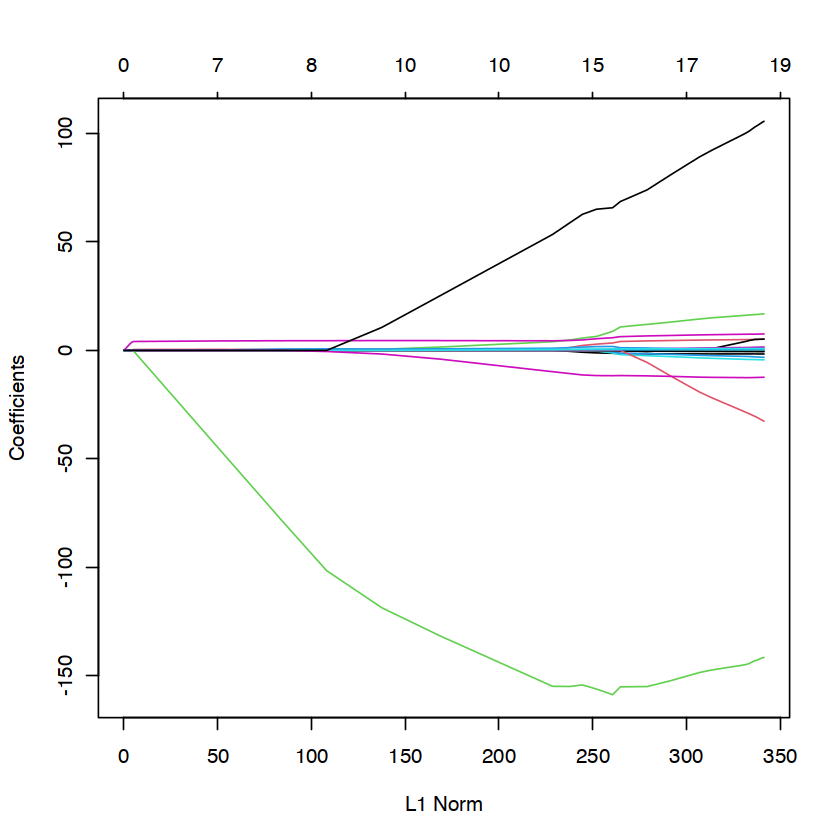

In [26]:
# The Lasso
lasso.mod <- glmnet(x[train, ], y[train], alpha = 1, lambda = grid)
plot(lasso.mod)

- We now perform cross-validation and compute the associated test error.

[1] 352.0256

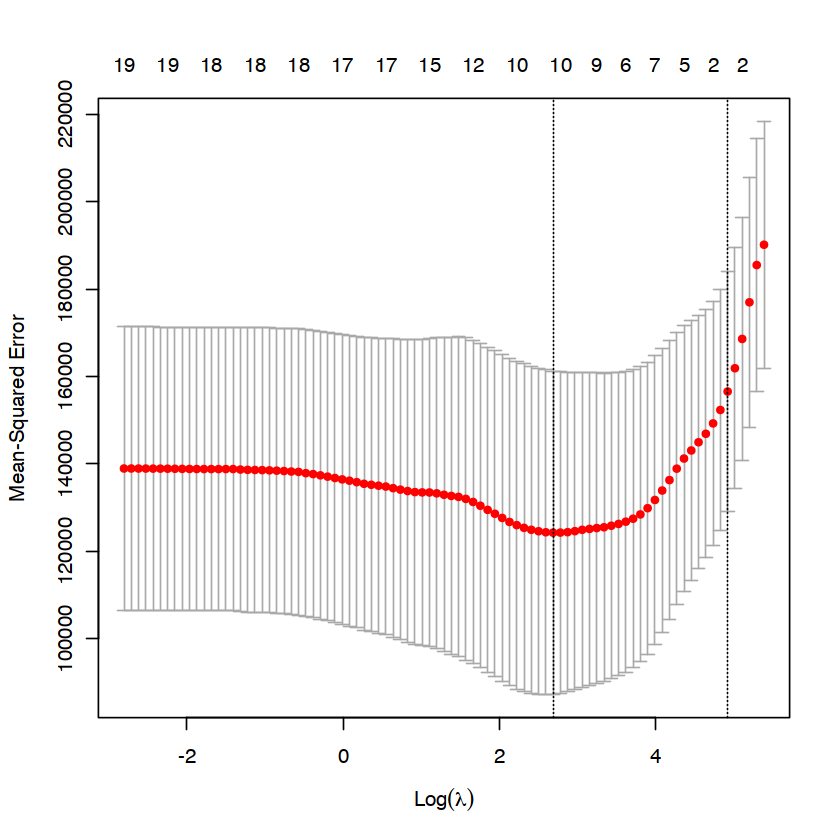

In [27]:
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 1)
plot(cv.out)
bestlam <- cv.out$lambda.min

lasso.pred <- predict(lasso.mod, s = bestlam, newx = x[test, ])
sqrt(mean((lasso.pred - y.test)^2))

- This is substantially lower than the test set MSE of the null model and of least squares, and very similar to the test MSE of ridge regression with λ chosen by cross-validation.
- However, the lasso has an advantage over ridge regression in that the resulting coefficient estimates are sparse (interpretability).

In [28]:
out <- glmnet(x, y, alpha = 1, lambda = grid)
lasso.coef <- predict(out, type = "coefficients", s = bestlam)[1:20, ]
lasso.coef
lasso.coef[lasso.coef != 0]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  11.9893213    0.0000000    1.8988773    0.0000000    0.0000000    0.0000000 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   2.2411938    0.0000000    0.0000000    0.0000000    0.0000000    0.2084941 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.4166866    0.0000000    6.7745425 -107.2546786    0.2253018    0.0000000 
      Errors   NewLeagueN 
   0.0000000    0.0000000

(Intercept)         Hits        Walks        CRuns         CRBI      LeagueN 
  11.9893213    1.8988773    2.2411938    0.2084941    0.4166866    6.7745425 
   DivisionW      PutOuts 
-107.2546786    0.2253018

- Half of the coefficients are shrinked to zeros!

## Comparison between Lasso and Ridge
- We already see that Lasso may not be better than Ridge.
- <font color='red'>Let's use simulation to analyze their performance when some true coefficients are zero, which means that Lasso is closer to the ground truth than Ridge.</font>

In [29]:
library(glmnet)

n <- 100 # Training size
ntest <- 500 # Test size
p <- 500 # Number of predictor variables
p_nonzero <- 0.5 * 500 # Number of non-zero predictor variables
nrep <- 30 # Repeat experiments 30 times

sb2 <- 0.5
se2 <- 1 - sb2

X <- matrix(rnorm(n * p), n, p) / sqrt(p)
Xtest <- matrix(rnorm(ntest * p), ntest, p) / sqrt(p)

beta <- rep(0, p)
beta[1:p_nonzero] <- rnorm(p_nonzero, 0, sqrt(sb2 * p / p_nonzero))
y0 <- X %*% beta
ytest <- Xtest %*% beta

beta_MSE <- pred_MSE <- matrix(0, nrep, 2)
for (irep in 1:nrep) {
    y <- y0 + rnorm(n, 0, sqrt(se2))

    fit_ridge <- cv.glmnet(X, y, alpha = 0)
    fit_lasso <- cv.glmnet(X, y, alpha = 1)

    beta_ridge <- predict(fit_ridge, type = "coefficients", s = fit_ridge$lambda.min)
    beta_lasso <- predict(fit_lasso, type = "coefficients", s = fit_lasso$lambda.min)

    beta_MSE[irep, 1] <- mean((beta - beta_ridge[-1])^2)
    beta_MSE[irep, 2] <- mean((beta - beta_lasso[-1])^2)

    pred_ridge <- predict(fit_ridge, Xtest, s = fit_ridge$lambda.min)
    pred_lasso <- predict(fit_lasso, Xtest, s = fit_lasso$lambda.min)

    pred_MSE[irep, 1] <- mean((ytest - pred_ridge)^2)
    pred_MSE[irep, 2] <- mean((ytest - pred_lasso)^2)
}

colnames(beta_MSE) <- colnames(pred_MSE) <- c("Ridge", "Lasso")

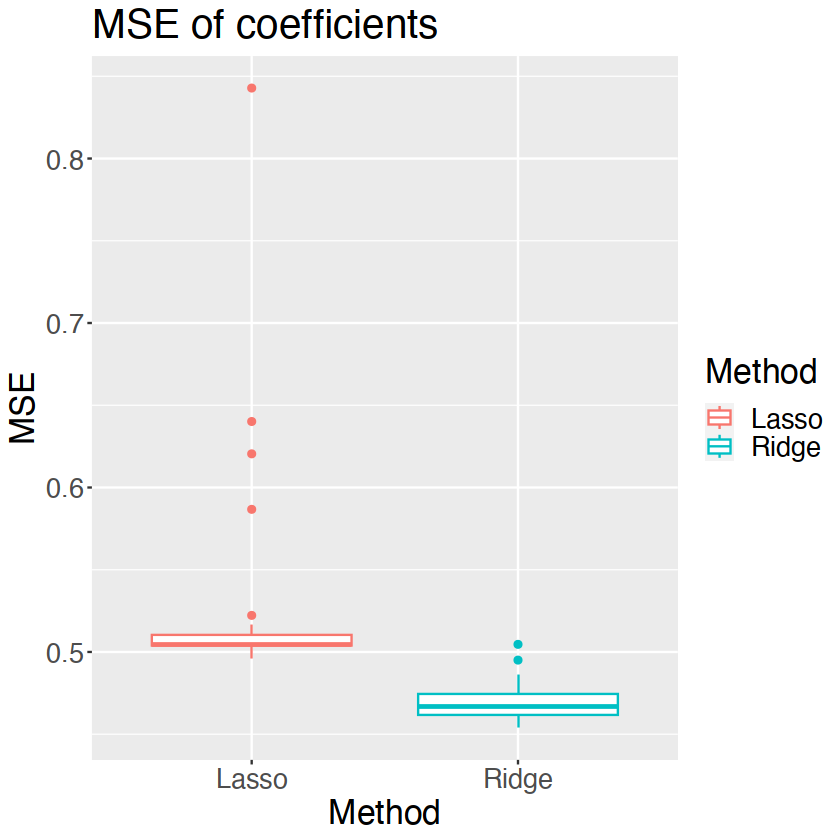

In [30]:
beta_MSE <- data.frame(MSE = as.vector(beta_MSE), 
                       Method = rep(c("Ridge", "Lasso"), each = nrep))
beta_MSE$Method <- factor(beta_MSE$Method)

ggplot(data = beta_MSE, aes(x = Method, y = MSE, color = Method)) +
    geom_boxplot() +
    ggtitle("MSE of coefficients") +
    theme(text = element_text(size = 20))

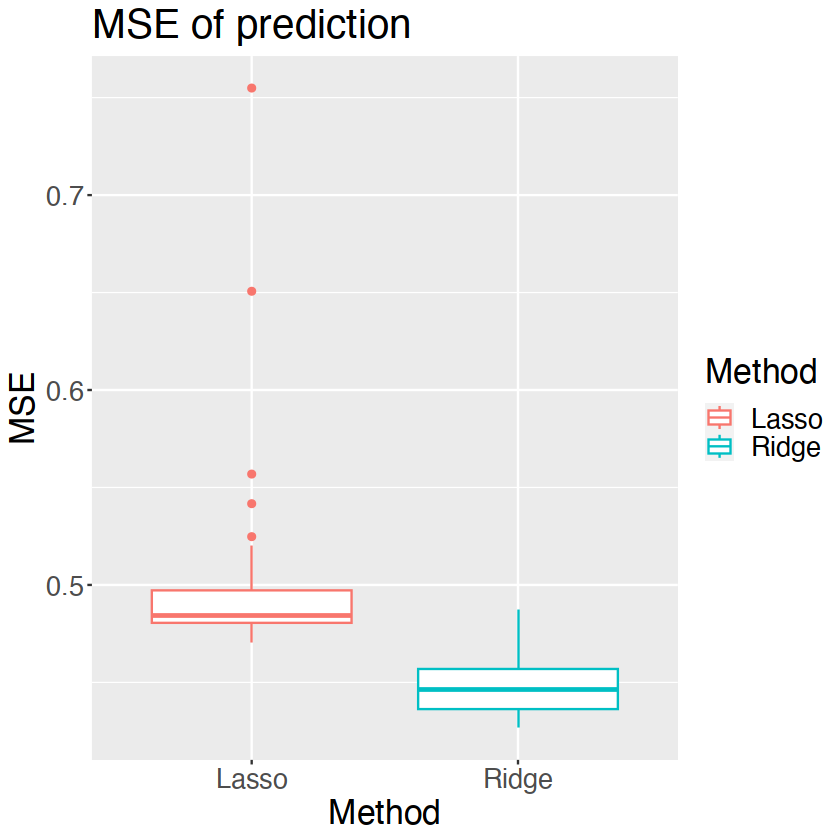

In [31]:
pred_MSE <- data.frame(MSE = as.vector(pred_MSE), 
                       Method = rep(c("Ridge", "Lasso"), each = nrep))
pred_MSE$Method <- factor(pred_MSE$Method)

ggplot(data = pred_MSE, aes(x = Method, y = MSE, color = Method)) +
    geom_boxplot() +
    ggtitle("MSE of prediction") +
    theme(text = element_text(size = 20))

Amazing! 
<font color='red'>In terms of both coefficients estimation and prediction accuracy, Ridge outperforms Lasso, which is expected to be a better method.</font>

Try to think about it!

Remember that we changed the <font color='red'>signal-to-noise ratio</font> (SNR or S/N) and compared the performances in the last tutorial.

This time we increase the <font color='red'>sample size</font> and reduce the <font color='red'>number of predictor variables</font>.

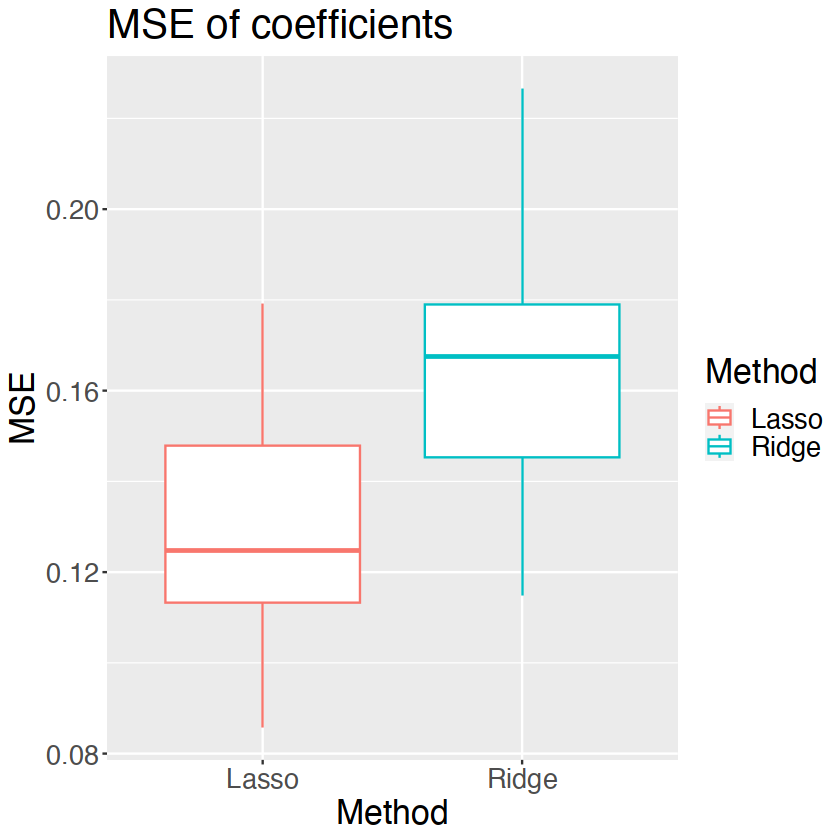

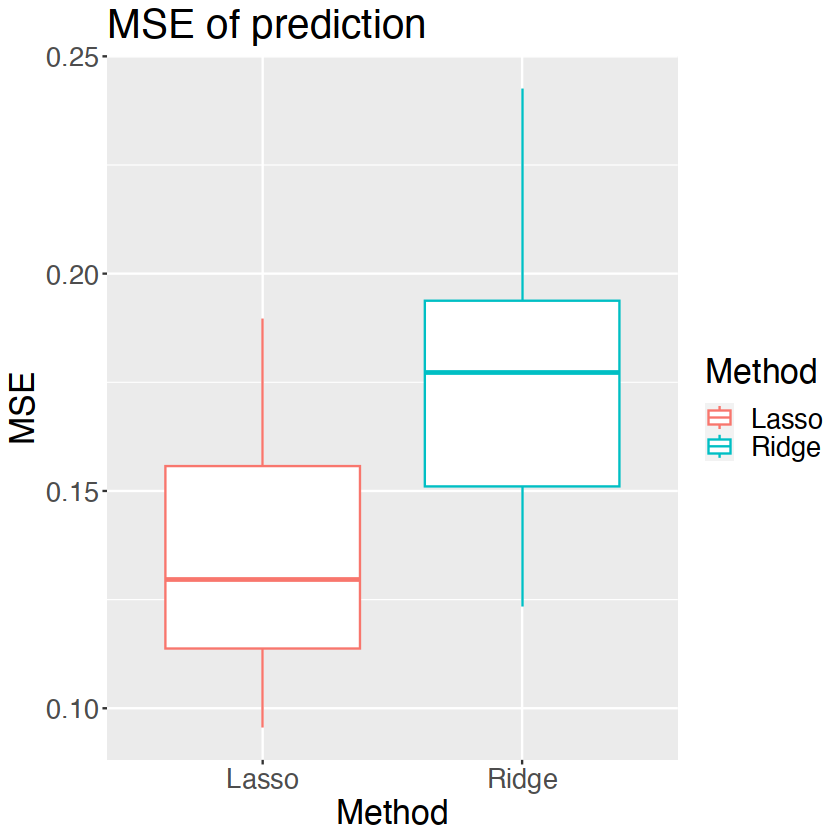

In [32]:
n <- 300 # 100 -> 300
ntest <- 500
p <- 100 # 500 -> 100
p_nonzero <- 0.5 * p
nrep <- 30

sb2 <- 0.5
se2 <- 1 - sb2

X <- matrix(rnorm(n * p), n, p) / sqrt(p)
Xtest <- matrix(rnorm(ntest * p), ntest, p) / sqrt(p)

beta <- rep(0, p)
beta[1:p_nonzero] <- rnorm(p_nonzero, 0, sqrt(sb2 * p / p_nonzero))
y0 <- X %*% beta
ytest <- Xtest %*% beta

beta_MSE <- pred_MSE <- matrix(0, nrep, 2)
for (irep in 1:nrep) {
    y <- y0 + rnorm(n, 0, sqrt(se2))

    fit_ridge <- cv.glmnet(X, y, alpha = 0)
    fit_lasso <- cv.glmnet(X, y, alpha = 1)

    beta_ridge <- predict(fit_ridge, type = "coefficients", s = fit_ridge$lambda.min)
    beta_lasso <- predict(fit_lasso, type = "coefficients", s = fit_lasso$lambda.min)

    beta_MSE[irep, 1] <- mean((beta - beta_ridge[-1])^2)
    beta_MSE[irep, 2] <- mean((beta - beta_lasso[-1])^2)

    pred_ridge <- predict(fit_ridge, Xtest, s = fit_ridge$lambda.min)
    pred_lasso <- predict(fit_lasso, Xtest, s = fit_lasso$lambda.min)

    pred_MSE[irep, 1] <- mean((ytest - pred_ridge)^2)
    pred_MSE[irep, 2] <- mean((ytest - pred_lasso)^2)
}

colnames(beta_MSE) <- colnames(pred_MSE) <- c("Ridge", "Lasso")

beta_MSE <- data.frame(MSE = as.vector(beta_MSE), 
                       Method = rep(c("Ridge", "Lasso"), each = nrep))
beta_MSE$Method <- factor(beta_MSE$Method)

ggplot(data = beta_MSE, aes(x = Method, y = MSE, color = Method)) +
    geom_boxplot() +
    ggtitle("MSE of coefficients") +
    theme(text = element_text(size = 20))

pred_MSE <- data.frame(MSE = as.vector(pred_MSE), 
                       Method = rep(c("Ridge", "Lasso"), each = nrep))
pred_MSE$Method <- factor(pred_MSE$Method)

ggplot(data = pred_MSE, aes(x = Method, y = MSE, color = Method)) +
    geom_boxplot() +
    ggtitle("MSE of prediction") +
    theme(text = element_text(size = 20))

<font color='red'>It's clear that the data quality (corresponding to the sample size here) plays a role!</font>